# 1 Importing the library


In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
import pickle
import requests
import matplotlib.pyplot as plt
import wget
from tensorflow import keras

In [3]:
def load_coursework_data():
    import wget
    path_to_check = os.path.join('', 'image_recognition_dataset.pth')
    if not os.path.exists(path_to_check):
        print("Cannot find the dataset on local !")
        print("Downloading the dataset from cloud, it may take several mintues.")
        url = 'https://www.dropbox.com/s/j05hyf667ikzu4s/image_recognition_dataset.pth?dl=1'
        filename = wget.download(url)
        data_path = os.path.join('', filename)
    else:
        print("Data founded on local {:s}".format(path_to_check))
        data_path = path_to_check
        
    data = pickle.load(open(data_path, 'rb'))
    train_imgs,train_labels,test_imgs,test_labels = data.values()
    return train_imgs, train_labels, test_imgs, test_labels

# 2 Building the model

## 2.1 Data Visualisation

Importing the data

In [4]:
train_imgs,train_labels,test_imgs,test_labels = load_coursework_data()
#X_train , y_train , X_test , y _test

Data founded on local image_recognition_dataset.pth


the training set constains 40000 images, each 32x32 pixels

In [ ]:
train_imgs.shape

(40000, 32, 32, 3)

In [ ]:
test_imgs

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

Each pixel intensity is represented as a byte (0 to 255), data type: int 8 bit

In [ ]:
train_imgs.dtype

dtype('uint8')

test set: 8000 images in 32x32

In [ ]:
test_imgs.shape

(8000, 32, 32, 3)

labels: 0~8

In [ ]:
test_labels

array([[3],
       [0],
       [6],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
train_labels

array([[6],
       [4],
       [1],
       ...,
       [6],
       [1],
       [1]], dtype=uint8)

In [ ]:
cls_train = len(np.unique(train_labels))
print("Total number of image classes : {:d}".format(cls_train))
print("Shape of training set", train_imgs.shape)

print("Training image count: ", train_imgs.shape[0])
print("Test image count: ", test_imgs.shape[0])

Total number of image classes : 8
Shape of training set (40000, 32, 32, 3)
Training image count:  40000
Test image count:  8000


## 2.2 training and testing 


here we are seperating train_imgs into two different groups. validation and the training one. 

In [ ]:
#validation: 5k
#X_train:35K 
#pixel normalisation to [0, 1]
train_validation, X_train = train_imgs[:5000] / 255., train_imgs[5000:] / 255.
test_validation , y_train = train_labels[:5000], train_labels[5000:]
test_imgs = test_imgs / 255.

Now we are going to plot some images that are in X_train.

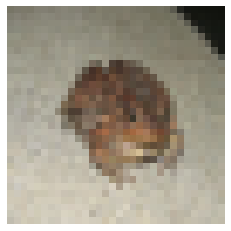

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
class_names = ["airplane","car","bird","cat","dear","dog","frog","horse"]

In [ ]:
y_train

array([[6],
       [1],
       [2],
       ...,
       [6],
       [1],
       [1]], dtype=uint8)

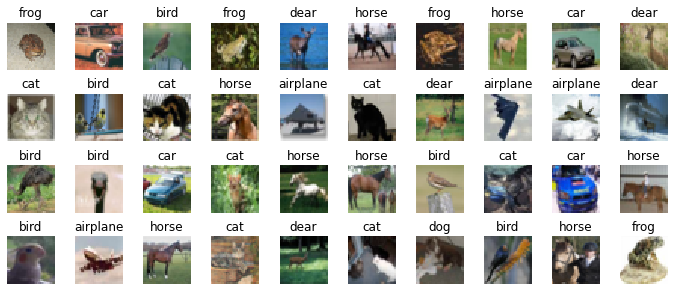

In [ ]:
#display first 40 images in training set
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(y_train[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 3 models

## 3.1 Base model (from the lab)

In [ ]:
#define MLP  with 3 layers, each input is a flettened row 32x32x3 pixel values
#.Flatten(): conver each input image into 1D array, no parameters in this layer
# add layers one by one    
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

Here we can see there are 4 layers in the model.

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 8)                 808       
                                                                 
Total params: 318,208
Trainable params: 318,208
Non-trainable params: 0
_________________________________________________________________


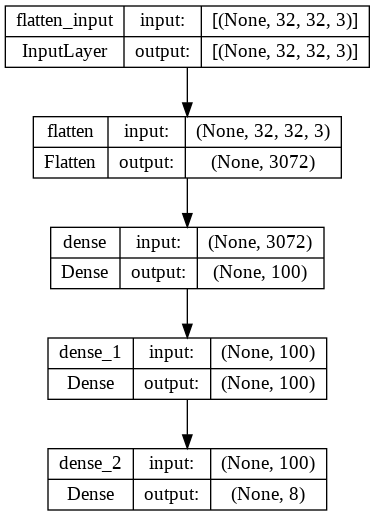

In [ ]:
## need to ask leon about it 

from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name
#get the layer hidden1.name, and assign it to hidden1 
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(3072, 100)

In [ ]:
weights

array([[ 1.2469821e-02,  1.7729864e-02, -1.5487485e-03, ...,
         2.9474251e-02, -4.2364400e-02, -3.2273833e-02],
       [-4.3387651e-02, -1.9672208e-02,  2.4828330e-02, ...,
        -3.9791342e-02,  1.6123950e-03, -3.4675330e-02],
       [-3.0620325e-02,  3.2146871e-02, -2.4296809e-02, ...,
        -6.9573596e-03,  3.3699758e-02,  3.5088010e-02],
       ...,
       [ 3.9216623e-02,  7.5680800e-03, -1.4597973e-02, ...,
         3.2554895e-02,  2.2760049e-02,  3.3083551e-02],
       [ 4.1575991e-02,  3.8360380e-02, -8.2738698e-06, ...,
         1.4675703e-02,  5.8691241e-03,  2.6370540e-02],
       [-3.7229557e-02, -3.9075300e-02,  1.3591446e-02, ...,
        -4.2206891e-02, -1.1472017e-02, -1.3060590e-02]], dtype=float32)

In [ ]:
biases.shape

(100,)

In [ ]:
#initialisation all to 0. 
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
#compile the model 
#sparse_categorical_crossentropy: output labels 0~9 
#categorical_crossentropy: [0 0 0 1 0 0 0 0 0 0] for class 3
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# setup a timer to know training time spent 
import time
start_time = time.process_time()

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(train_validation, test_validation))

print("\n Training Time:", (time.process_time() - start_time)/60, "minutes") 

Epoch 1/20
1094/1094 [==============================] - 6s 3ms/step - loss: 1.7971 - accuracy: 0.3277 - val_loss: 1.7141 - val_accuracy: 0.3618
Epoch 2/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.6263 - accuracy: 0.4061 - val_loss: 1.5506 - val_accuracy: 0.4300
Epoch 3/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5525 - accuracy: 0.4332 - val_loss: 1.5417 - val_accuracy: 0.4326
Epoch 4/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5057 - accuracy: 0.4528 - val_loss: 1.4843 - val_accuracy: 0.4550
Epoch 5/20
1094/1094 [==============================] - 3s 2ms/step - loss: 1.4722 - accuracy: 0.4645 - val_loss: 1.4409 - val_accuracy: 0.4642
Epoch 6/20
1094/1094 [==============================] - 3s 2ms/step - loss: 1.4457 - accuracy: 0.4720 - val_loss: 1.4600 - val_accuracy: 0.4658
Epoch 7/20
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4166 - accuracy: 0.4849 - val_loss: 1.4348 - val_accuracy:

In [ ]:
X_train.size

107520000

In [ ]:
y_train.size

35000

In [ ]:
train_validation.size

15360000

In [ ]:
test_validation.size

5000

history.params


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['val_accuracy']

[0.3617999851703644,
 0.4300000071525574,
 0.4325999915599823,
 0.45500001311302185,
 0.4641999900341034,
 0.4657999873161316,
 0.4733999967575073,
 0.47699999809265137,
 0.4652000069618225,
 0.47200000286102295,
 0.4903999865055084,
 0.5031999945640564,
 0.5052000284194946,
 0.503000020980835,
 0.49459999799728394,
 0.5049999952316284,
 0.4819999933242798,
 0.49779999256134033,
 0.48919999599456787,
 0.5221999883651733]

We can see that the model have an accuracy level of 0.76 which is better than the last model. Now let's make the plot of both models.

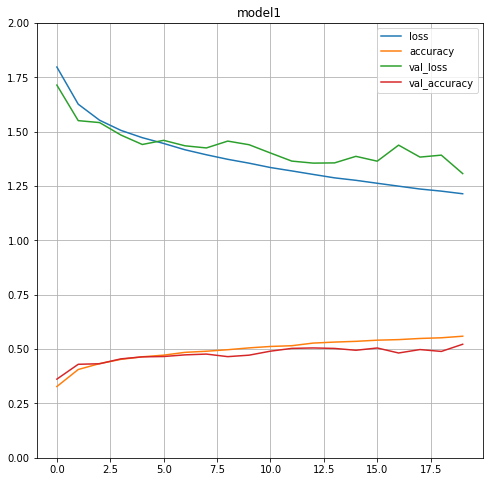

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 8))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title("model1")
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
model.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.2906 - accuracy: 0.5265


[1.2905998229980469, 0.5264999866485596]

we can see that the accuracy of the model is 0.5410

In [ ]:
model.evaluate(train_validation, test_validation)

157/157 [==============================] - 0s 2ms/step - loss: 1.3071 - accuracy: 0.5222


[1.30711030960083, 0.5221999883651733]

Now let s try ot predict some images

## 3.2 Model with more hidden layers 


To improve the accuracy of the model we will do couple thing. 
First we will try adding extra hidden layer to see if the model accuracy is higher.

In [ ]:
model_extra_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

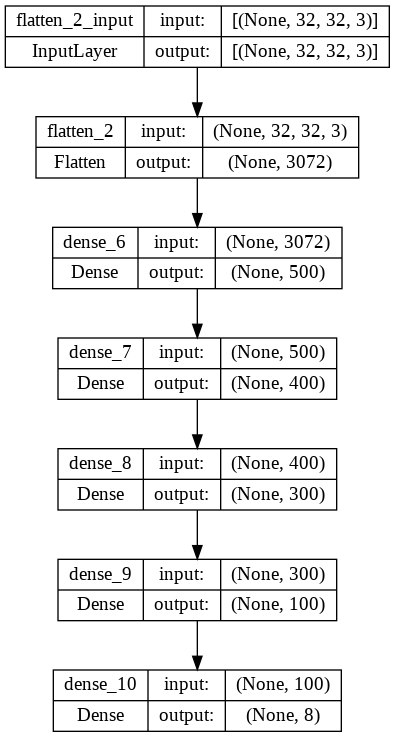

In [ ]:
keras.utils.plot_model(model_extra_layers, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model_extra_layers.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model_extra_layers.fit(X_train, y_train, epochs=10,
                    validation_data=(train_validation, test_validation))

Epoch 1/10
1094/1094 [==============================] - 4s 3ms/step - loss: 1.7806 - accuracy: 0.3363 - val_loss: 1.5937 - val_accuracy: 0.4192
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5914 - accuracy: 0.4165 - val_loss: 1.5563 - val_accuracy: 0.4240
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5148 - accuracy: 0.4485 - val_loss: 1.4764 - val_accuracy: 0.4630
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4581 - accuracy: 0.4663 - val_loss: 1.4296 - val_accuracy: 0.4738
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4116 - accuracy: 0.4814 - val_loss: 1.4617 - val_accuracy: 0.4526
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3762 - accuracy: 0.4977 - val_loss: 1.4091 - val_accuracy: 0.4852
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3376 - accuracy: 0.5091 - val_loss: 1.3989 - val_accuracy:

In [ ]:
model_extra_layers.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.3640 - accuracy: 0.5038


[1.3639591932296753, 0.5037500262260437]

We can see that increasing the number of hidden layer doesn't improve the accuracy of the model. This might be because the model is learning more parameters and it needed to solve the problem. Because when we add an extra layer it just means adding more neurons.

## 3.3 Model with increase perceptrons in hidden layers




In [ ]:
model_extra_neurons = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

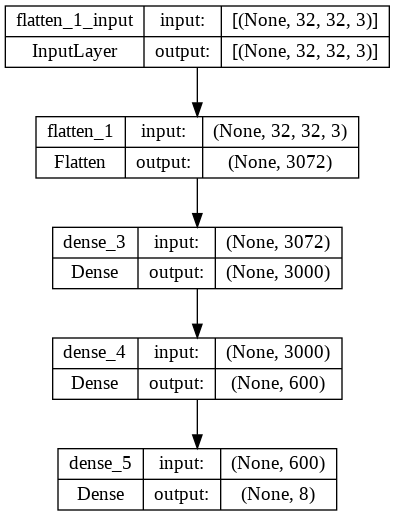

In [ ]:
keras.utils.plot_model(model_extra_neurons, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model_extra_neurons.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model_extra_neurons.fit(X_train, y_train, epochs=10,
                    validation_data=(train_validation, test_validation))

Epoch 1/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.7124 - accuracy: 0.3693 - val_loss: 1.5596 - val_accuracy: 0.4286
Epoch 2/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.5394 - accuracy: 0.4410 - val_loss: 1.4894 - val_accuracy: 0.4462
Epoch 3/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.4687 - val_loss: 1.4439 - val_accuracy: 0.4776
Epoch 4/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4130 - accuracy: 0.4868 - val_loss: 1.4070 - val_accuracy: 0.4860
Epoch 5/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3659 - accuracy: 0.5049 - val_loss: 1.3691 - val_accuracy: 0.5036
Epoch 6/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3284 - accuracy: 0.5198 - val_loss: 1.3625 - val_accuracy: 0.4986
Epoch 7/10
1094/1094 [==============================] - 3s 3ms/step - loss: 1.2953 - accuracy: 0.5314 - val_loss: 1.3717 - val_accuracy:

In [ ]:
model_extra_neurons.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 1.4047 - accuracy: 0.4746


[1.4047374725341797, 0.47462499141693115]

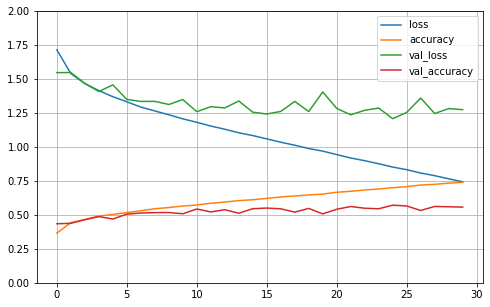

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

increasing the neurons doesn't help much it didn t increase the accuracy of the model.

## 3.4 Model with more epochs


In [ ]:
model_extra_epochs = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32,3]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

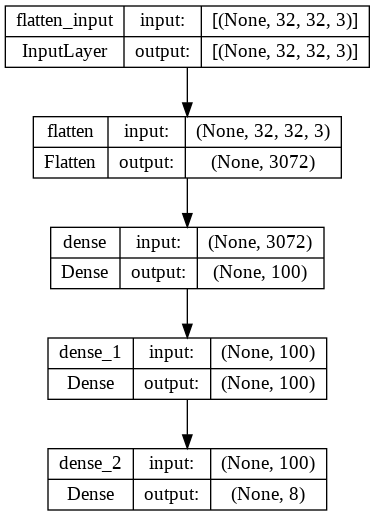

In [ ]:
keras.utils.plot_model(model_extra_epochs, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model_extra_epochs.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model_extra_epochs.fit(X_train, y_train, epochs=30,
                    validation_data=(train_validation, test_validation))

Epoch 1/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4822 - accuracy: 0.4604 - val_loss: 1.4793 - val_accuracy: 0.4532
Epoch 2/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4441 - accuracy: 0.4728 - val_loss: 1.4269 - val_accuracy: 0.4738
Epoch 3/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.4148 - accuracy: 0.4864 - val_loss: 1.4673 - val_accuracy: 0.4558
Epoch 4/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3902 - accuracy: 0.4941 - val_loss: 1.5109 - val_accuracy: 0.4314
Epoch 5/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3660 - accuracy: 0.5044 - val_loss: 1.4571 - val_accuracy: 0.4676
Epoch 6/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3452 - accuracy: 0.5121 - val_loss: 1.3910 - val_accuracy: 0.4950
Epoch 7/30
1094/1094 [==============================] - 3s 3ms/step - loss: 1.3222 - accuracy: 0.5186 - val_loss: 1.4110 - val_accuracy:

In [ ]:
model_extra_epochs.evaluate(test_imgs, test_labels)

250/250 [==============================] - 1s 2ms/step - loss: 3.0660 - accuracy: 0.5579


[3.065995693206787, 0.5578749775886536]

We can see that the number of epoch doesnt impact much the accuracy. We can see that there is no correlation betweeen the training accuracy and the testing accuracy. This is because when training the model, it does not retain or learn about the feature.

Now lets try another approch the deep learning CNN approch

# 4 CNN Models

In [6]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 4.1 Base model

In [9]:

train_validation, X_train = train_imgs[:5000] , train_imgs[5000:] 
test_validation , y_train = train_labels[:5000], train_labels[5000:]


X_train_mean = X_train.mean(axis = 0, keepdims = True)
X_train_std  =X_train.std(axis = 0, keepdims = True) + 1e-7
X_train = (X_train - X_train_mean)/ X_train_std
train_validation = (train_validation - X_train_mean)/ X_train_std
test_imgs = (test_imgs - X_train_mean) / X_train_std

X_train = X_train[..., np.newaxis]
train_validation = train_validation[..., np.newaxis]
test_imgs = test_imgs[..., np.newaxis]

We first build the CNN structure

In [30]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

modeles = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

then we train the model 

In [31]:
import time
start_time = time.process_time()

modeles.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = modeles.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = modeles.evaluate(test_imgs, test_labels)


Epoch 1/10
1094/1094 [==============================] - 11s 7ms/step - loss: 1.7891 - accuracy: 0.3106 - val_loss: 1.4257 - val_accuracy: 0.4816
Epoch 2/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.4182 - accuracy: 0.4775 - val_loss: 1.1937 - val_accuracy: 0.5620
Epoch 3/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2596 - accuracy: 0.5492 - val_loss: 1.1546 - val_accuracy: 0.5764
Epoch 4/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.1530 - accuracy: 0.5940 - val_loss: 1.0315 - val_accuracy: 0.6276
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.0634 - accuracy: 0.6277 - val_loss: 0.9867 - val_accuracy: 0.6470
Epoch 6/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9909 - accuracy: 0.6531 - val_loss: 0.9730 - val_accuracy: 0.6532
Epoch 7/10
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9240 - accuracy: 0.6753 - val_loss: 0.9342 - val_accuracy

In [33]:
pred_imgs = test_imgs[:20]
prediction = modeles.predict(pred_imgs)
prediction.round(2)

1/1 [==============================] - 0s 55ms/step


array([[0.01, 0.  , 0.09, 0.37, 0.05, 0.36, 0.03, 0.09],
       [0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.19, 0.07, 0.43, 0.03, 0.25, 0.01],
       [0.01, 0.03, 0.05, 0.06, 0.08, 0.01, 0.75, 0.  ],
       [0.07, 0.14, 0.05, 0.31, 0.07, 0.17, 0.05, 0.13],
       [0.08, 0.01, 0.27, 0.1 , 0.37, 0.06, 0.06, 0.05],
       [0.  , 0.  , 0.05, 0.51, 0.02, 0.38, 0.02, 0.02],
       [0.07, 0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.29, 0.02, 0.18, 0.05, 0.38, 0.03, 0.01, 0.05],
       [0.02, 0.01, 0.12, 0.31, 0.13, 0.22, 0.08, 0.11],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.02, 0.16, 0.  , 0.81, 0.  , 0.01],
       [0.01, 0.  , 0.07, 0.04, 0.27, 0.14, 0.  , 0.48],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.01, 0.01, 0.06, 0.07, 0.  , 0.85],
       [0.84, 0.  , 0.16, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.52, 0.  , 0.24, 0.01, 0.22, 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.18, 0.04,

In [34]:
images_pred = np.argmax(prediction, axis= 1)
images_pred

array([3, 0, 4, 6, 3, 4, 3, 1, 4, 3, 7, 5, 7, 6, 7, 0, 0, 4, 2, 4])

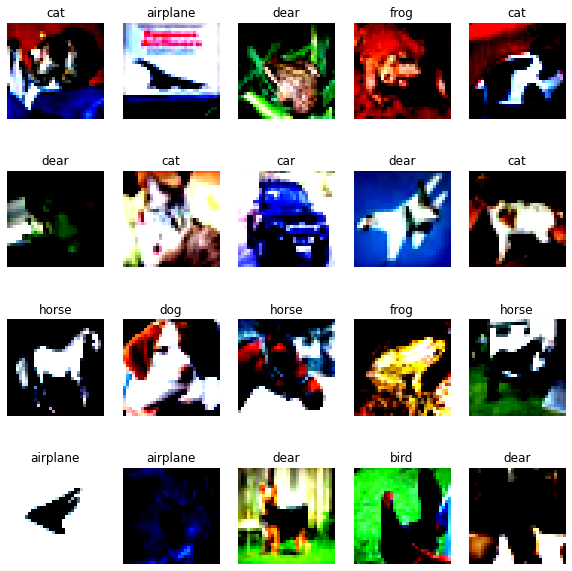

In [37]:
plt.figure(figsize=( 10,  10))
show_new_images = np.squeeze(pred_imgs)
for index, image in enumerate(show_new_images):
        plt.subplot(4, 5, index + 1)
        plt.imshow(image, cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(images_pred[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 4.2 Model with extra **layers**

Now let's  try to make the accuracy better by adding an extra layer



In [38]:

from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
model_CNN = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [39]:
import time
start_time = time.process_time()

model_CNN.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_CNN = model_CNN.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = model_CNN.evaluate(test_imgs, test_labels)

Epoch 1/10
1094/1094 [==============================] - 11s 8ms/step - loss: 1.8739 - accuracy: 0.2590 - val_loss: 1.5391 - val_accuracy: 0.4118
Epoch 2/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.5060 - accuracy: 0.4366 - val_loss: 1.3225 - val_accuracy: 0.5076
Epoch 3/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.3425 - accuracy: 0.5081 - val_loss: 1.2252 - val_accuracy: 0.5492
Epoch 4/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.2268 - accuracy: 0.5564 - val_loss: 1.1843 - val_accuracy: 0.5726
Epoch 5/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1462 - accuracy: 0.5906 - val_loss: 1.0997 - val_accuracy: 0.6054
Epoch 6/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0725 - accuracy: 0.6208 - val_loss: 1.0467 - val_accuracy: 0.6280
Epoch 7/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0163 - accuracy: 0.6453 - val_loss: 1.0217 - val_accuracy

We can see that adding extra layers. The accuracy decreases. This might be because we added more trainable parameters that is not useful that result in the decline in the accuracy.

## 4.3 model with reduced layers

Now how about we reduce the number of parameter by deleting one layer. 

In [42]:
from functools import partial

from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
model_CNN1 = keras.models.Sequential([
    DefaultConv2D(filters=32, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [43]:
import time
start_time = time.process_time()

model_CNN1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_CNN1 = model_CNN1.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = model_CNN1.evaluate(test_imgs, test_labels)

Epoch 1/10
1094/1094 [==============================] - 9s 7ms/step - loss: 1.5873 - accuracy: 0.3982 - val_loss: 1.1376 - val_accuracy: 0.5732
Epoch 2/10
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1868 - accuracy: 0.5715 - val_loss: 1.0014 - val_accuracy: 0.6398
Epoch 3/10
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0205 - accuracy: 0.6409 - val_loss: 0.9366 - val_accuracy: 0.6690
Epoch 4/10
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9135 - accuracy: 0.6858 - val_loss: 0.8775 - val_accuracy: 0.6980
Epoch 5/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.8298 - accuracy: 0.7163 - val_loss: 0.8041 - val_accuracy: 0.7186
Epoch 6/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7568 - accuracy: 0.7429 - val_loss: 0.8104 - val_accuracy: 0.7262
Epoch 7/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.7004 - accuracy: 0.7630 - val_loss: 0.7656 - val_accuracy:

1/1 [==============================] - 0s 48ms/step


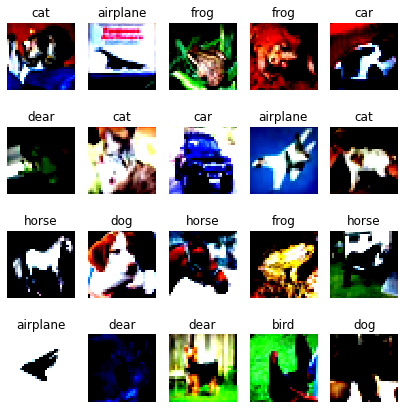

In [46]:
pred_imgs = test_imgs[:20]
prediction = model_CNN1.predict(pred_imgs)
prediction.round(2)

images_pred = np.argmax(prediction, axis= 1)
images_pred

plt.figure(figsize=( 7,  7))
show_new_images = np.squeeze(pred_imgs)
for index, image in enumerate(show_new_images):
        plt.subplot(4, 5, index + 1)
        plt.imshow(image, cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(images_pred[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

We can see that deleting a layer result in the increase of the accuracy. how about we train the model a bit longer and see if it impact the accuracy.

## 4.4 Model with extra epochs

In [47]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

modelo = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])



In [48]:
import time
start_time = time.process_time()

modelo.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_modelo = modelo.fit(X_train, y_train, epochs=30, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = modelo.evaluate(test_imgs,test_labels)

Epoch 1/30
1094/1094 [==============================] - 9s 7ms/step - loss: 1.7431 - accuracy: 0.3443 - val_loss: 1.3374 - val_accuracy: 0.5108
Epoch 2/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.3535 - accuracy: 0.5106 - val_loss: 1.2860 - val_accuracy: 0.5488
Epoch 3/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.1872 - accuracy: 0.5745 - val_loss: 1.0655 - val_accuracy: 0.6160
Epoch 4/30
1094/1094 [==============================] - 7s 7ms/step - loss: 1.0830 - accuracy: 0.6209 - val_loss: 0.9941 - val_accuracy: 0.6544
Epoch 5/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9905 - accuracy: 0.6571 - val_loss: 0.9238 - val_accuracy: 0.6668
Epoch 6/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9079 - accuracy: 0.6883 - val_loss: 0.8957 - val_accuracy: 0.6796
Epoch 7/30
1094/1094 [==============================] - 7s 7ms/step - loss: 0.8449 - accuracy: 0.7097 - val_loss: 0.9195 - val_accuracy:

with more epochs we get a little bit more accuracy. We got 67 with 20 epochs and 65 with 10 epochs. 

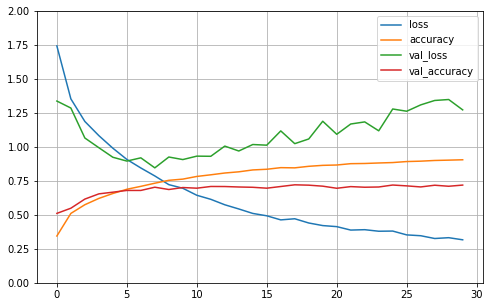

In [49]:
import pandas as pd

pd.DataFrame(history_modelo.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [ ]:
dict1 = {'val_loss':history.history['val_loss'],'accuracy':history.history['accuracy']}
dict2 = {'val_loss':history.history['val_loss'], 'loss':history.history['loss']}
import pandas as pd
pd.DataFrame(dict2).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

Before the 5 epoches, we can see that both that both lines are decreasing that mean the model is learning from the images. But after the epochs 5 we can see that the model got so good at the training set that it get worse on the validation set.This is a case of overfitting

In [ ]:
dict1 = {'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy']}
dict2 = {'val_loss':history.history['val_loss'], 'loss':history.history['loss']}
import pandas as pd
pd.DataFrame(dict1).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

From epochs 0 to 5 the models is learning which increase the accuracy of the training set and validation set but after epoch 5 the validation accuracy set stays constant and the accuracy increases. This is when the model start fitting the images instead of learning it which explain the stagnation of the validation accuracy. The model is overfitting.

## 4.5 Paul's model

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

paul_model = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
import time
start_time = time.process_time()

paul_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_model = paul_model.fit(X_train, y_train, epochs=40, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = paul_model.evaluate(test_imgs,test_labels)

Epoch 1/40
1094/1094 [==============================] - 12s 9ms/step - loss: 1.4195 - accuracy: 0.4771 - val_loss: 1.1605 - val_accuracy: 0.5752
Epoch 2/40
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1233 - accuracy: 0.5906 - val_loss: 1.0254 - val_accuracy: 0.6244
Epoch 3/40
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0158 - accuracy: 0.6294 - val_loss: 0.9690 - val_accuracy: 0.6446
Epoch 4/40
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9518 - accuracy: 0.6545 - val_loss: 0.9237 - val_accuracy: 0.6712
Epoch 5/40
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8990 - accuracy: 0.6775 - val_loss: 0.8876 - val_accuracy: 0.6778
Epoch 6/40
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8574 - accuracy: 0.6874 - val_loss: 0.8610 - val_accuracy: 0.6868
Epoch 7/40
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8285 - accuracy: 0.6999 - val_loss: 0.8410 - val_ac

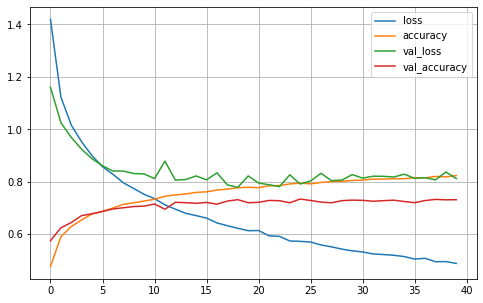

In [ ]:
import pandas as pd

pd.DataFrame(history_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

paul_model1 = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
import time
start_time = time.process_time()

paul_model1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = paul_model1.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = paul_model1.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 12s 9ms/step - loss: 1.4161 - accuracy: 0.4772 - val_loss: 1.1548 - val_accuracy: 0.5782
Epoch 2/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1083 - accuracy: 0.5962 - val_loss: 1.0086 - val_accuracy: 0.6258
Epoch 3/10
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0011 - accuracy: 0.6365 - val_loss: 0.9622 - val_accuracy: 0.6506
Epoch 4/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.9350 - accuracy: 0.6605 - val_loss: 0.9709 - val_accuracy: 0.6460
Epoch 5/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8883 - accuracy: 0.6792 - val_loss: 0.9102 - val_accuracy: 0.6686
Epoch 6/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8461 - accuracy: 0.6943 - val_loss: 0.9471 - val_accuracy: 0.6572
Epoch 7/10
1094/1094 [==============================] - 10s 9ms/step - loss: 0.8198 - accuracy: 0.7038 - val_loss: 0.8562 - val_ac

# Different activation function

## 4.7 Model with leaky relu

In [10]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

paul_model2 = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [11]:
import time
start_time = time.process_time()

paul_model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = paul_model2.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = paul_model2.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 14s 9ms/step - loss: 1.3058 - accuracy: 0.5253 - val_loss: 1.0663 - val_accuracy: 0.6166
Epoch 2/10
1094/1094 [==============================] - 9s 9ms/step - loss: 1.0241 - accuracy: 0.6321 - val_loss: 0.9561 - val_accuracy: 0.6534
Epoch 3/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.9305 - accuracy: 0.6700 - val_loss: 0.8940 - val_accuracy: 0.6868
Epoch 4/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.8765 - accuracy: 0.6871 - val_loss: 0.8746 - val_accuracy: 0.6886
Epoch 5/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.8390 - accuracy: 0.7008 - val_loss: 0.7996 - val_accuracy: 0.7160
Epoch 6/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.7974 - accuracy: 0.7167 - val_loss: 0.8555 - val_accuracy: 0.7004
Epoch 7/10
1094/1094 [==============================] - 9s 9ms/step - loss: 0.7715 - accuracy: 0.7270 - val_loss: 0.7810 - val_accuracy

While using the leaky relu, the accuracy of the model is higher because the it doesnt has the dying start problem 

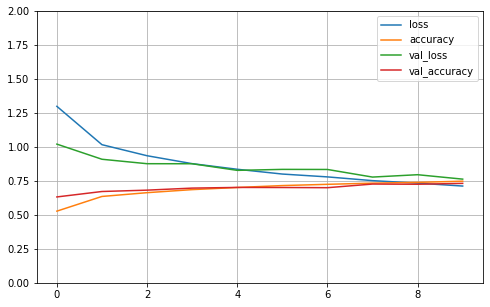

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

## 4.8 Model with Prelu

In [12]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='PReLU', padding="SAME")

paul_model3 = keras.models.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(units=256, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [13]:
import time
start_time = time.process_time()

paul_model3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = paul_model3.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "ms") 

score = paul_model3.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 15s 12ms/step - loss: 1.3783 - accuracy: 0.4903 - val_loss: 1.0893 - val_accuracy: 0.6028
Epoch 2/10
1094/1094 [==============================] - 12s 11ms/step - loss: 1.0564 - accuracy: 0.6166 - val_loss: 0.9986 - val_accuracy: 0.6302
Epoch 3/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.9452 - accuracy: 0.6613 - val_loss: 0.9187 - val_accuracy: 0.6776
Epoch 4/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.8713 - accuracy: 0.6844 - val_loss: 0.8400 - val_accuracy: 0.6980
Epoch 5/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.8152 - accuracy: 0.7055 - val_loss: 0.8514 - val_accuracy: 0.6940
Epoch 6/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.7802 - accuracy: 0.7200 - val_loss: 0.8036 - val_accuracy: 0.7142
Epoch 7/10
1094/1094 [==============================] - 12s 11ms/step - loss: 0.7555 - accuracy: 0.7284 - val_loss: 0.7779 -

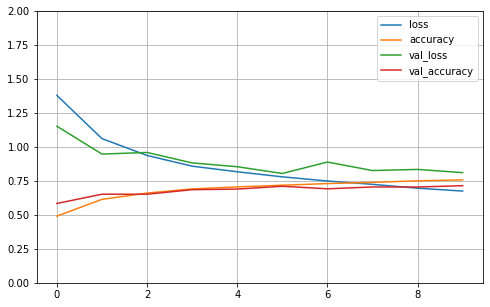

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

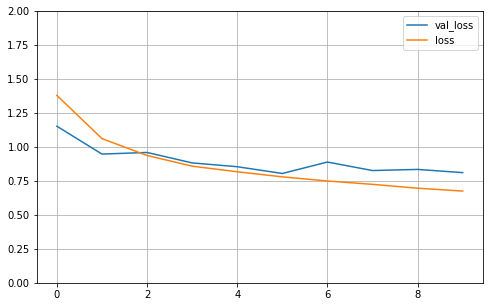

In [ ]:
dict1 = {'val_loss':history.history['val_loss'],'accuracy':history.history['accuracy']}
dict2 = {'val_loss':history.history['val_loss'], 'loss':history.history['loss']}
import pandas as pd
pd.DataFrame(dict2).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

Before the 5 epoches, we can see that both that both lines are decreasing that mean the model is learning from the images. But after the epochs 5 we can see that the model got so good at the training set that it get worse on the validation set.This is a case of overfitting

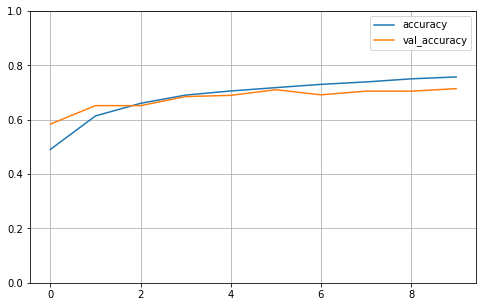

In [ ]:
dict1 = {'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy']}
dict2 = {'val_loss':history.history['val_loss'], 'loss':history.history['loss']}
import pandas as pd
pd.DataFrame(dict1).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

From epochs 0 to 5 the models is learning which increase the accuracy of the training set and validation set but after epoch 5 the validation accuracy set stays constant and the accuracy increases. This is when the model start fitting the images instead of learning it which explain the stagnation of the validation accuracy. The model is overfitting.

#  different optimizer

## 4.9 Model with sgd

In [14]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_op = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [15]:
import time
start_time = time.process_time()

model_op.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model_op.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "ms") 

score = model_op.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.8920 - accuracy: 0.2649 - val_loss: 1.6079 - val_accuracy: 0.4406
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.6205 - accuracy: 0.3957 - val_loss: 1.3828 - val_accuracy: 0.5008
Epoch 3/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.4723 - accuracy: 0.4559 - val_loss: 1.3199 - val_accuracy: 0.5128
Epoch 4/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.3503 - accuracy: 0.5063 - val_loss: 1.1937 - val_accuracy: 0.5726
Epoch 5/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2602 - accuracy: 0.5441 - val_loss: 1.1068 - val_accuracy: 0.6060
Epoch 6/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.1838 - accuracy: 0.5783 - val_loss: 1.0618 - val_accuracy: 0.6192
Epoch 7/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.1172 - accuracy: 0.6049 - val_loss: 0.9827 - val_accuracy:

Here we have an accuracy of 59 percent which is lower than the previous one and took 58704 ms

## 4.10 Model with adam

In [16]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_op1 = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [17]:
import time
start_time = time.process_time()

model_op1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model_op1.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "ms") 

score = model_op1.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.7541 - accuracy: 0.3253 - val_loss: 1.4902 - val_accuracy: 0.4550
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.4364 - accuracy: 0.4742 - val_loss: 1.2309 - val_accuracy: 0.5426
Epoch 3/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2940 - accuracy: 0.5319 - val_loss: 1.1692 - val_accuracy: 0.5670
Epoch 4/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2102 - accuracy: 0.5669 - val_loss: 1.0852 - val_accuracy: 0.6066
Epoch 5/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.1214 - accuracy: 0.6032 - val_loss: 1.0566 - val_accuracy: 0.6182
Epoch 6/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.0713 - accuracy: 0.6235 - val_loss: 1.0263 - val_accuracy: 0.6388
Epoch 7/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.0165 - accuracy: 0.6420 - val_loss: 0.9958 - val_accuracy:

We get that the model accuracy is 59 percent which is similar to the previous one and took 71301 ms

# Different loss function

## 4.11 Model with poisson

```
# This is formatted as code
```



In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_loss1 = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
import time
start_time = time.process_time()

model_loss1.compile(loss="poisson", optimizer="nadam", metrics=["accuracy"])
history = model_loss1.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "ms") 

score = model_loss1.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 10s 7ms/step - loss: 7.3965 - accuracy: 0.1273 - val_loss: 7.4496 - val_accuracy: 0.1270
Epoch 2/10
1094/1094 [==============================] - 8s 7ms/step - loss: 7.3964 - accuracy: 0.1231 - val_loss: 7.4496 - val_accuracy: 0.1270
Epoch 3/10
1094/1094 [==============================] - 8s 7ms/step - loss: 7.3964 - accuracy: 0.1251 - val_loss: 7.4496 - val_accuracy: 0.1154
Epoch 4/10
1094/1094 [==============================] - 8s 7ms/step - loss: 7.3964 - accuracy: 0.1260 - val_loss: 7.4496 - val_accuracy: 0.1154
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 7.3964 - accuracy: 0.1229 - val_loss: 7.4496 - val_accuracy: 0.1270
Epoch 6/10
1094/1094 [==============================] - 8s 7ms/step - loss: 7.3964 - accuracy: 0.1231 - val_loss: 7.4496 - val_accuracy: 0.1248
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 7.3964 - accuracy: 0.1275 - val_loss: 7.4496 - val_accuracy

We can see that the poisson loss function doesn t fit this model the performance is really bad and the accurace us really low around 0.12.

## 4.12 Model with hinge

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_loss2 = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [ ]:
import time
start_time = time.process_time()

model_loss2.compile(loss="hinge", optimizer="nadam", metrics=["accuracy"])
history = model_loss2.fit(X_train, y_train, epochs=10, validation_data=(train_validation, test_validation))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "ms") 

score = model_loss2.evaluate(test_imgs,test_labels)

Epoch 1/10
1094/1094 [==============================] - 10s 7ms/step - loss: 0.5629 - accuracy: 0.1294 - val_loss: 0.5597 - val_accuracy: 0.1336
Epoch 2/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.5629 - accuracy: 0.1246 - val_loss: 0.5597 - val_accuracy: 0.1334
Epoch 3/10
1094/1094 [==============================] - 8s 8ms/step - loss: 0.5629 - accuracy: 0.1265 - val_loss: 0.5597 - val_accuracy: 0.1330
Epoch 4/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.5629 - accuracy: 0.1279 - val_loss: 0.5597 - val_accuracy: 0.1326
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.5629 - accuracy: 0.1294 - val_loss: 0.5597 - val_accuracy: 0.1322
Epoch 6/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.5629 - accuracy: 0.1276 - val_loss: 0.5597 - val_accuracy: 0.1322
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.5634 - accuracy: 0.1283 - val_loss: 0.5597 - val_accuracy

# 5 Data augmentation


In [7]:
from scipy.ndimage import rotate
from PIL import Image
from skimage.util import random_noise
import cv2

# function to make the image rotate with the angle we input
def rotate_img(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "Incorrect image shape"
    rgb = len(img.shape) == 3
    if rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

#### 5.1 Data augmentation with only noise image

There is also another way to improve the accuracy of the is by adding extra image so the model have more image to train on.

In [8]:
new_image_noise = []
for i in range(len(train_imgs)):
    img = Image.fromarray(train_imgs[i])
    noise_img = random_noise(train_imgs[i], mode='s&p', amount= 0.2)
    new_image_noise.append(noise_img)
print(len(new_image_noise))

40000


checking the first 4 noisy images.

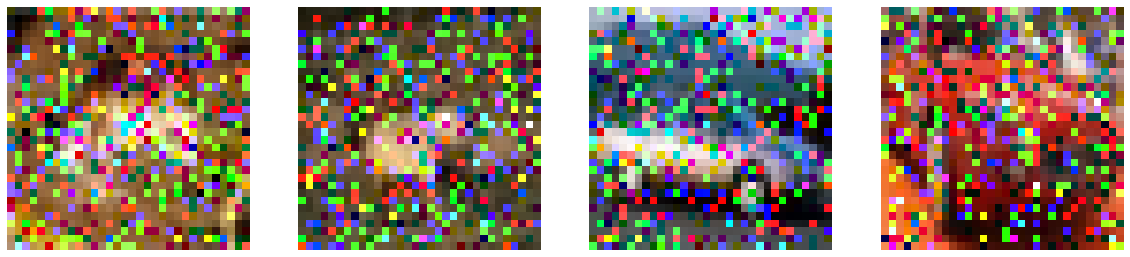

In [9]:
#display first 40 images in training set
n_rows = 1
n_cols = 4
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(new_image_noise[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(class_names[int(y_train[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
for i in range(len(new_image_noise)):
    new_image_noise[i] = new_image_noise[i]* 255
    new_image_noise[i] = new_image_noise[i].astype(np.uint8)

In [11]:
new_image_noise = np.array(new_image_noise)

This is for the img

In [12]:
extra_img = np.concatenate((train_imgs, new_image_noise) , axis = 0)
extra_img.shape

(80000, 32, 32, 3)

This is for the labels

In [13]:
extra_label = np.concatenate((train_labels, train_labels))
extra_label.shape

(80000, 1)

In [14]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_extradata = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [16]:
train_validation_extradata, X_train_extradata = extra_img[:10000] , extra_img[10000:] 
test_validation_extradata , y_train_extradata = extra_label[:10000], extra_label[10000:]

X_train_mean = X_train_extradata.mean(axis = 0, keepdims = True)
X_train_std  =X_train_extradata.std(axis = 0, keepdims = True) + 1e-7
X_train_extradata = (X_train_extradata - X_train_mean)/ X_train_std
train_validation_extradata = (train_validation_extradata - X_train_mean)/ X_train_std
test_imgs = (test_imgs - X_train_mean) / X_train_std

X_train_extradata = X_train_extradata[..., np.newaxis]
train_validation_extradata = train_validation_extradata[..., np.newaxis]
test_imgs = test_imgs[..., np.newaxis]

In [17]:
import time
start_time = time.process_time()

model_extradata.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_extradata.fit(X_train_extradata, y_train_extradata, epochs=30, validation_data=(train_validation_extradata, test_validation_extradata))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = model_extradata.evaluate(test_imgs,test_labels)

Epoch 1/20
2188/2188 [==============================] - 19s 7ms/step - loss: 1.7102 - accuracy: 0.3459 - val_loss: 1.4114 - val_accuracy: 0.4776
Epoch 2/20
2188/2188 [==============================] - 15s 7ms/step - loss: 1.3910 - accuracy: 0.4956 - val_loss: 1.1419 - val_accuracy: 0.5779
Epoch 3/20
2188/2188 [==============================] - 15s 7ms/step - loss: 1.2829 - accuracy: 0.5388 - val_loss: 1.0746 - val_accuracy: 0.5985
Epoch 4/20
2188/2188 [==============================] - 15s 7ms/step - loss: 1.2025 - accuracy: 0.5720 - val_loss: 1.0590 - val_accuracy: 0.6197
Epoch 5/20
2188/2188 [==============================] - 15s 7ms/step - loss: 1.1443 - accuracy: 0.5919 - val_loss: 1.0085 - val_accuracy: 0.6385
Epoch 6/20
2188/2188 [==============================] - 15s 7ms/step - loss: 1.0939 - accuracy: 0.6161 - val_loss: 0.9991 - val_accuracy: 0.6443
Epoch 7/20
2188/2188 [==============================] - 15s 7ms/step - loss: 1.0460 - accuracy: 0.6333 - val_loss: 0.9137 - val_ac

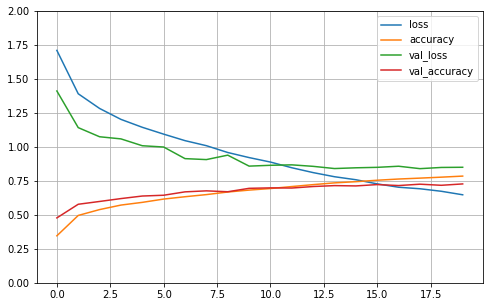

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

1/1 [==============================] - 0s 150ms/step


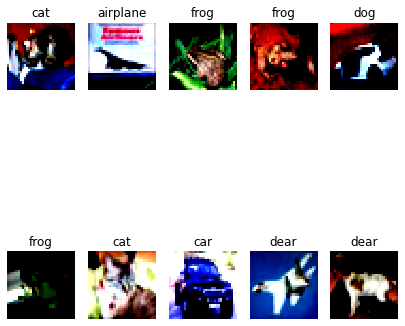

In [19]:
pred_imgs = test_imgs[:10]
prediction = model_extradata.predict(pred_imgs)
prediction.round(2)

images_pred = np.argmax(prediction, axis= 1)
images_pred

plt.figure(figsize=( 7,  7))
show_new_images = np.squeeze(pred_imgs)
for index, image in enumerate(show_new_images):
        plt.subplot(2, 5, index + 1)
        plt.imshow(image, cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(images_pred[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### 5.2 Data augmentation with only rotation image

Here we are taking images and rotate then different angle so the we can get more images to train the data

In [21]:
new_image_rotation= []
for i in range(len(train_imgs)):
    img = Image.fromarray(train_imgs[i])
    # rotating the image with different angles
    angle_30 = rotate_img(train_imgs[i], 30  , bg_patch=(32,32))
    angle_90 = rotate_img(train_imgs[i], 90  , bg_patch=(32,32))
    angle_180 = rotate_img(train_imgs[i], 180  , bg_patch=(32,32))
    angle_330 =  rotate_img(train_imgs[i], 330  , bg_patch=(32,32))
    
   
     
    new_image_rotation.append(angle_30)
    new_image_rotation.append(angle_90)
    new_image_rotation.append(angle_180)
    new_image_rotation.append(angle_330)
   

print(len(new_image_rotation))

160000


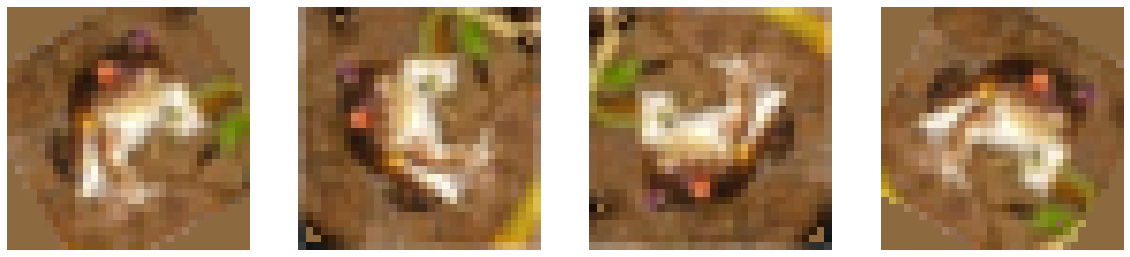

In [22]:
#display first 40 images in training set
n_rows = 1
n_cols = 4
plt.figure(figsize=(n_cols * 5, n_rows * 5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(new_image_rotation[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(class_names[int(y_train[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [23]:
rotation_label = []
for i in range(len(train_labels)):
    for j in range(len(train_labels[0])):
        rotation_label.append(train_labels[i][j])
        rotation_label.append(train_labels[i][j])
        rotation_label.append(train_labels[i][j])
        rotation_label.append(train_labels[i][j])

rotation_label = np.array(rotation_label)

In [24]:
print(rotation_label)
print(rotation_label.shape)
rotation_label = np.reshape(rotation_label ,(160000,1))
print(rotation_label)

[6 6 6 ... 1 1 1]
(160000,)
[[6]
 [6]
 [6]
 ...
 [1]
 [1]
 [1]]


This is for the img

In [25]:
extrarot_img = np.concatenate((train_imgs, new_image_rotation) , axis = 0)
extrarot_img.shape

(200000, 32, 32, 3)

This is for the label

In [26]:
extrarot_label = np.concatenate((train_labels, rotation_label))
extrarot_label.shape

(200000, 1)

In [27]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model_extrarotdata = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=8, activation='softmax'),
])

In [28]:
train_validation_extrarotdata, X_train_extrarotdata = extrarot_img[:10000] , extrarot_img[10000:] 
test_validation_extrarotdata , y_train_extrarotdata = extrarot_label[:10000], extrarot_label[10000:]

X_train_extrarot_mean = X_train_extrarotdata.mean(axis = 0, keepdims = True)
X_train_extrarot_std  = X_train_extrarotdata.std(axis = 0, keepdims = True) + 1e-7
X_train_extrarotdata = (X_train_extrarotdata - X_train_extrarot_mean)/ X_train_extrarot_std
train_validation_extrarotdata = (train_validation_extrarotdata - X_train_extrarot_mean)/ X_train_extrarot_std
#test_imgs_extrarot = (test_imgs - X_train_extrarot_mean) / X_train_extrarot_std

X_train_extrarotdata = X_train_extrarotdata[..., np.newaxis]
train_validation_extrarotdata = train_validation_extrarotdata[..., np.newaxis]
#test_imgs = test_imgs[..., np.newaxis]

In [29]:
import time
start_time = time.process_time()

model_extrarotdata.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_extrarotdata.fit(X_train_extrarotdata, y_train_extrarotdata, epochs=20, validation_data=(train_validation_extrarotdata, test_validation_extrarotdata))
# on colab ~2.5 mins  

print("\n Training Time:", (time.process_time() - start_time/60), "minutes") 

score = model_extrarotdata.evaluate(test_imgs,test_labels)

Epoch 1/20
5938/5938 [==============================] - 41s 7ms/step - loss: 1.6738 - accuracy: 0.3737 - val_loss: 1.3292 - val_accuracy: 0.5150
Epoch 2/20
5938/5938 [==============================] - 39s 7ms/step - loss: 1.4300 - accuracy: 0.4821 - val_loss: 1.2471 - val_accuracy: 0.5529
Epoch 3/20
5938/5938 [==============================] - 39s 7ms/step - loss: 1.3553 - accuracy: 0.5129 - val_loss: 1.1631 - val_accuracy: 0.5705
Epoch 4/20
5938/5938 [==============================] - 39s 7ms/step - loss: 1.3087 - accuracy: 0.5344 - val_loss: 1.1496 - val_accuracy: 0.5829
Epoch 5/20
5938/5938 [==============================] - 39s 7ms/step - loss: 1.2747 - accuracy: 0.5484 - val_loss: 1.0962 - val_accuracy: 0.6092
Epoch 6/20
5938/5938 [==============================] - 39s 7ms/step - loss: 1.2550 - accuracy: 0.5582 - val_loss: 1.1010 - val_accuracy: 0.6019
Epoch 7/20
5938/5938 [==============================] - 39s 7ms/step - loss: 1.2373 - accuracy: 0.5648 - val_loss: 1.0901 - val_ac

The accuracy of the model is 64%

In [ ]:
pred_imgs = test_imgs[:10]
prediction = model_extrarotdata.predict(pred_imgs)
prediction.round(2)

images_pred = np.argmax(prediction, axis= 1)
images_pred


plt.figure(figsize=( 7,  2))
show_new_images = np.squeeze(pred_imgs)
for index, image in enumerate(show_new_images):
        plt.subplot(2, 5, index + 1)
        plt.imshow(image, cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(images_pred[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()